In [55]:
# Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Use pandas_reader.data.DataReader to load the desired data.
# Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.
# your_data = data.DataReader('INPX', 'yahoo', start_date, end_date)
from pandas_datareader import data
from pandas_datareader import data as pdr

# pip install yfinance
import yfinance as yf
# pandas_datareader override from "https://pypi.org/project/yfinance/"
yf.pdr_override()

import shutil, os, time, glob, smtplib, ssl

# pip install get-all-tickers
from get_all_tickers import get_tickers as gt

In [56]:
# tickers = ["FB", "AMZN", "MSFT", "TSLA" ... ] or
tickers = gt.get_tickers_filtered(mktcap_min=150000, mktcap_max=10000000)

# Check that the amount of tickers isn't more than 1800
print('The amount of stocks chosen to observe: ' + str(len(tickers)))

The amount of stocks chosen to observe: 55


In [61]:
# download dataframe
data = pdr.get_data_yahoo("INTC AAPL MSFT TSLA GOOG", start='2020-01-01', end='2020-11-17')

# or in the above line
start_date = '2020-01-02'
end_date = '2020-11-17'
tickers = ["FB", "AMZN", "MSFT", "TSLA", "BRKB"]

[*********************100%***********************]  5 of 5 completed


In [62]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [63]:
print(all_weekdays)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-16', '2020-11-17'],
              dtype='datetime64[ns]', length=229, freq='B')


In [64]:
close.head(10)

,AAPL,GOOG,INTC,MSFT,TSLA
2020-01-02,75.087502,1367.369995,60.840000,160.619995,86.052002
2020-01-03,74.357498,1360.660034,60.099998,158.619995,88.601997
2020-01-06,74.949997,1394.209961,59.930000,159.029999,90.307999
2020-01-07,74.597504,1393.339966,58.930000,157.580002,93.811996
2020-01-08,75.797501,1404.319946,58.970001,160.089996,98.428001
2020-01-09,77.407501,1419.829956,59.299999,162.089996,96.267998
2020-01-10,77.582497,1429.729980,58.939999,161.339996,95.629997
2020-01-13,79.239998,1439.229980,59.590000,163.279999,104.972000
2020-01-14,78.169998,1430.880005,59.430000,162.130005,107.584000
2020-01-15,77.834999,1439.199951,58.939999,163.179993,103.699997


In [65]:
close.describe()

,AAPL,GOOG,INTC,MSFT,TSLA
count,229.000000,229.000000,229.000000,229.000000,229.000000
mean,91.302434,1442.851634,55.837904,189.798122,245.422497
std,20.053310,148.831661,6.320714,22.558711,126.613055
min,56.092499,1056.619995,44.110001,135.419998,72.244003
25%,75.797501,1383.939941,49.939999,170.889999,145.966003
50%,84.699997,1458.630005,57.990002,188.699997,189.983994
75%,112.820000,1520.579956,60.090000,209.190002,388.040009
max,134.179993,1781.380005,68.470001,231.649994,498.320007


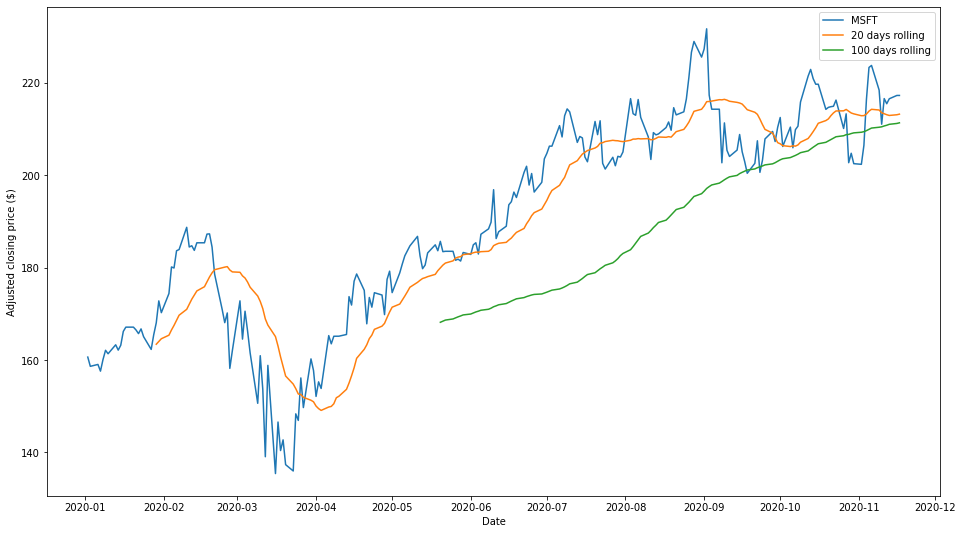

In [67]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()